In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
!pip install selenium
import selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import sys, io, os
import PIL
from PIL import Image, ImageOps
import requests
import time
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Sequential
import numpy as np
import random
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# install google chrome
!wget https://dl.google.com/linux/linux_signing_key.pub
!sudo apt-key add linux_signing_key.pub
!echo 'deb [arch=amd64] http://dl.google.com/linux/chrome/deb/ stable main' >> /etc/apt/sources.list.d/google-chrome.list
!sudo apt-get -y update
!sudo apt-get install -y google-chrome-stable

# install chromedriver
# !apt-get install -y qq unzip
!wget -O /tmp/chromedriver.zip https://storage.googleapis.com/chrome-for-testing-public/126.0.6478.126/linux64/chromedriver-linux64.zip
!unzip /tmp/chromedriver.zip chromedriver-linux64/chromedriver -d /usr/local/bin/
!mv /usr/local/bin/chromedriver-linux64/chromedriver /usr/local/bin/chromedriver

In [4]:
!google-chrome --version
!chromedriver -v

Google Chrome 126.0.6478.126 
ChromeDriver 126.0.6478.126 (d36ace6122e0a59570e258d82441395206d60e1c-refs/branch-heads/6478@{#1591})


In [5]:
FAKE_PATH = Path("/kaggle/input/cifake-real-and-ai-generated-synthetic-images/train/FAKE")
REAL_PATH = Path("/kaggle/input/cifake-real-and-ai-generated-synthetic-images/train/REAL")

fake_list_path = list(FAKE_PATH.glob('*.jpg'))
real_list_path = list(REAL_PATH.glob('*.jpg'))

In [78]:
img_size = 48
data_dir = "/kaggle/input/cifake-real-and-ai-generated-synthetic-images/"
categories = ['REAL', 'FAKE']

def load_data(data_dir, categories, img_size, sample_size = 10**5):
    data = []
    for y, category in enumerate(categories):
        path = os.path.join(data_dir, category)
        for img in os.listdir(path)[:sample_size]:
                img_array = Image.open(os.path.join(path, img))
                resized_array = ImageOps.fit(img_array, (img_size,img_size), Image.Resampling.LANCZOS)
                resized_array = np.array(resized_array) / 255.0
                data.append([resized_array, y])
    return data

# Load and preprocess the data
training_data = load_data(data_dir+"train/", categories, img_size, sample_size=20000)\
               +load_data(data_dir+"test/", categories, img_size, sample_size=20000)


X_train = [features for features, label in training_data]
y_train = [   label for features, label in training_data]

X_train = np.array(X_train).reshape(-1, img_size, img_size, 3)
y_train = np.array(y_train)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15)

In [79]:
X_train.shape

(48000, 48, 48, 3)

In [84]:
model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.7322 - loss: 0.5179 - val_accuracy: 0.8119 - val_loss: 0.4324
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8411 - loss: 0.3618 - val_accuracy: 0.8643 - val_loss: 0.3110
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8755 - loss: 0.3012 - val_accuracy: 0.8987 - val_loss: 0.2443
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8939 - loss: 0.2591 - val_accuracy: 0.9051 - val_loss: 0.2383
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8986 - loss: 0.2481 - val_accuracy: 0.9134 - val_loss: 0.2084
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9064 - loss: 0.2277 - val_accuracy: 0.9108 - val_loss: 0.2201
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9084 - loss: 0.2265 - val_accuracy: 0.9132 - val_loss: 0.2190
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9145 - loss: 0.2102 -

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9377 - loss: 0.1618
Test accuracy: 0.9367499947547913
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      5992
           1       0.94      0.93      0.94      6008

    accuracy                           0.94     12000
   macro avg       0.94      0.94      0.94     12000
weighted avg       0.94      0.94      0.94     12000



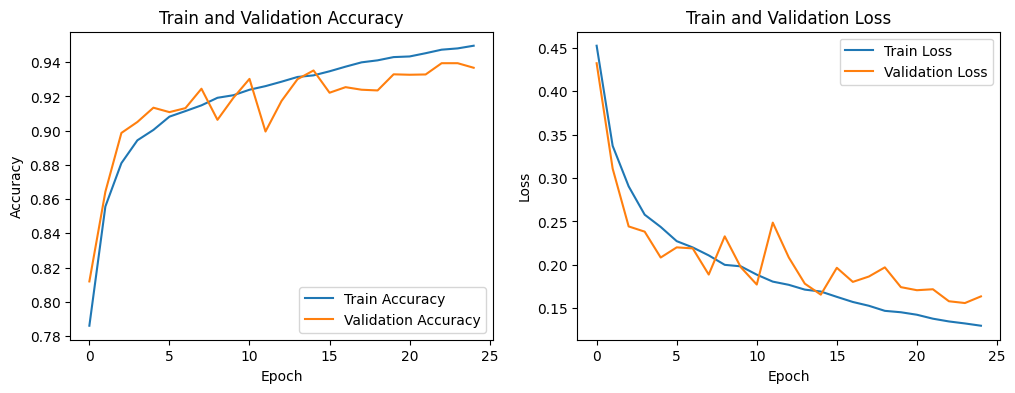

In [85]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

y_pred = model.predict(X_test)
y_predicted = (y_pred > 0.5).astype("int32").flatten()

print(classification_report(y_test, y_predicted))

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Train and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Train and Validation Loss')

plt.show()

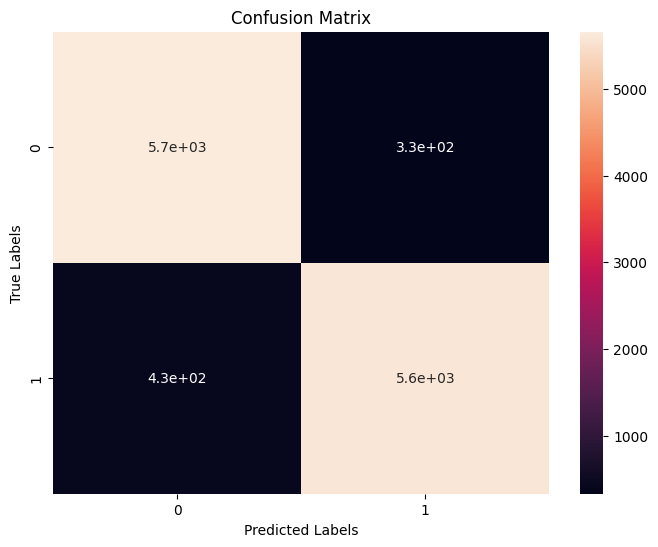

In [97]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
confusion_mat = confusion_matrix(y_test, y_pred>0.5)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [88]:
model.save("ai.h5")

# Scrape the web, shall we?

In [56]:
!rm -rf /kaggle/working/AI
!rm -rf /kaggle/working/NON

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--headless')
#chrome_options.add_argument('--disable-gpu')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument("--window-size=1920,1080")
driver = webdriver.Chrome(options=chrome_options)

urlAI="https://www.google.com/search?q=ai+art+filetype%3Ajpg&sca_esv=9cd90a64e37ec4fc&sca_upv=1&udm=2&biw=1536&bih=730&sxsrf=ADLYWIJOxqvpGyqsBYYqmRV_pRJvpYHMwg%3A1719876553212&ei=yTuDZuDKDKWNnesP-sm6mAM&ved=0ahUKEwig04u4_4aHAxWlRmcHHfqkDjMQ4dUDCBA&uact=5&oq=ai+generated+images+filetype%3Ajpg&gs_lp=Egxnd3Mtd2l6LXNlcnAiIGFpIGdlbmVyYXRlZCBpbWFnZXMgZmlsZXR5cGU6anBnSJQGUI0EWI0EcAF4AJABAJgBhgGgAYYBqgEDMC4xuAEDyAEA-AEBmAIAoAIAmAMAiAYBkgcAoAct&sclient=gws-wiz-serp"
urlNON="https://www.google.com/search?q=art+filetype%3Ajpg&sca_esv=9cd90a64e37ec4fc&sca_upv=1&udm=2&biw=1536&bih=730&sxsrf=ADLYWIJOxqvpGyqsBYYqmRV_pRJvpYHMwg%3A1719876553212&ei=yTuDZuDKDKWNnesP-sm6mAM&ved=0ahUKEwig04u4_4aHAxWlRmcHHfqkDjMQ4dUDCBA&uact=5&oq=ai+generated+images+filetype%3Ajpg&gs_lp=Egxnd3Mtd2l6LXNlcnAiIGFpIGdlbmVyYXRlZCBpbWFnZXMgZmlsZXR5cGU6anBnSJQGUI0EWI0EcAF4AJABAJgBhgGgAYYBqgEDMC4xuAEDyAEA-AEBmAIAoAIAmAMAiAYBkgcAoAct&sclient=gws-wiz-serp"

for url,folder_path in ((urlAI,"AI"),(urlNON,"NON")):
  driver.get(url)

  for x in range(4):
      driver.execute_script("window.scrollTo(0,document.body.scrollHeight);")
      time.sleep(2)

  imgResults = driver.find_elements(By.CLASS_NAME, "YQ4gaf")
  
  total=0
  for i,img in enumerate(imgResults):
    src = img.get_attribute('src')
    if "favicon" in src or "base64" in src: continue
    # Get the image from the URL
    image_content = requests.get(src).content
    file_name=str(i)
    image_file = io.BytesIO(image_content)
    image = Image.open(image_file).convert('RGB')
    if not os.path.exists(folder_path):
        os.mkdir(folder_path)
    file_path = os.path.join(folder_path,file_name+'.jpg')
    with open(file_path, 'wb') as f:
        image.save(f, "JPEG", quality=100)
    total+=1
  print(f"Saved {folder_path} - {total}")
    
driver.quit()

Saved AI - 498
Saved NON - 418


In [57]:
AI_PATH = Path("/kaggle/working/AI")
NON_PATH = Path("/kaggle/working/NON")
ai_list_path = list(AI_PATH.glob('*.jpg'))
non_list_path = list(NON_PATH.glob('*.jpg'))

## On an AI image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step
Foiled! Model predicts AI tomfoolery


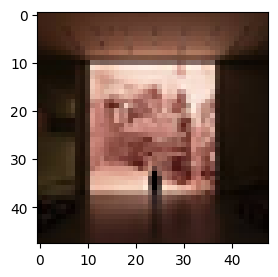

In [89]:
ai_img = random.choice(ai_list_path)
ai_img = Image.open(ai_img)
ai_img = ImageOps.fit(ai_img, (img_size,img_size), Image.Resampling.LANCZOS)

plt.figure(figsize = (3,3))
plt.imshow(ai_img)
ai_img = np.array(ai_img).reshape(-1,img_size,img_size,3)

confidence = model.predict(ai_img)[0,0]
if confidence > 0.5: print("Foiled! Model predicts AI tomfoolery")
else: print("Safe! Model deems you AI-free")

## On a non-AI image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Safe! Model deems you AI-free


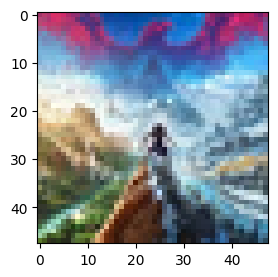

In [95]:
non_img = random.choice(non_list_path)
non_img = Image.open(non_img)
non_img = ImageOps.fit(non_img, (img_size,img_size), Image.Resampling.LANCZOS)

plt.figure(figsize = (3,3))
plt.imshow(non_img)
non_img = np.array(non_img).reshape(-1,img_size,img_size,3)


confidence = model.predict(non_img)[0,0]
if confidence > 0.5: print("Foiled! Model predicts AI tomfoolery")
else: print("Safe! Model deems you AI-free")

In [96]:
# web_data_dir = "/kaggle/working"
# categories = ['NON', 'AI']

# web_data = load_data(web_data_dir, categories, img_size)

# random.shuffle(web_data)

# X_web = []; y_web = []

# for features, label in web_data:
#     X_web.append(features)
#     y_web.append(label)

# X_web = np.array(X_web).reshape(-1, img_size, img_size, 3)
# y_web = np.array(y_web)

# web_loss, web_acc = model.evaluate(X_web, y_web)
# print(f"Web Test Accuracy: {web_acc}")

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5720 - loss: 3.3081
Web Test Accuracy: 0.557860255241394
